<a href="https://colab.research.google.com/github/ahamedalshafath/task-7/blob/main/Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
     

Importing the dataset


In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
df. head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df=df.drop("User ID",axis=1)
df=df.drop_duplicates()
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [5]:
df.Gender=df.Gender.map({"Male":1,"Female":0})
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,380.000000,380.000000,380.000000,380.000000
mean,0.478947,37.586842,70421.052632,0.368421
std,0.500215,10.592492,34604.155483,0.483012
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.000000,43000.000000,0.000000
50%,0.000000,37.000000,70500.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [6]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

Splitting the dataset into the Training set and Test set

---



In [7]:
x=df[['Gender', 'Age', 'EstimatedSalary']].values
y=df["Purchased"].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
scaller=StandardScaler()
scaller.fit(x_train)
x_train=scaller.transform(x_train)
x_test=scaller.transform(x_test)

Fitting Decision Tree Classification to the Training set

In [10]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

Predicting the Test set result

In [11]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0])

Making the Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[40  8]
 [ 7 21]]


In [13]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.736842105263158


Visualising the Training set results

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


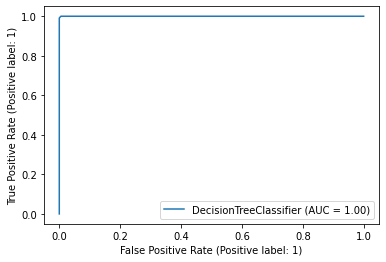

In [14]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,x_train,y_train);

Visualising the Test set results

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


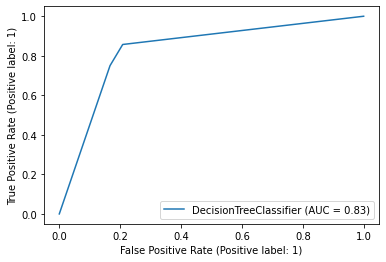

In [15]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,x_test,y_test)